In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
    

In [2]:
type(data)

dict

In [3]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\thety\AppData\Local\Temp\ipykernel_25848\644439384.py:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10237,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.939031e+07,1.939031e+07,False,NaN,1,NaN,NaN,None,2023-06-02T01:26:00.000Z,26801.003189,1.490282e+10,-8.6349,0.274250,-1.242235,1.358483,-6.026441,-4.443514,19.703134,5.196797e+11,46.0451,5.628211e+11,None,2023-06-02T01:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 01:28:20.826862
1,1027,Ethereum,ETH,ethereum,6961,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202456e+08,1.202456e+08,True,NaN,2,NaN,NaN,None,2023-06-02T01:26:00.000Z,1865.769837,5.485840e+09,-14.5410,0.352203,-0.719367,3.556795,0.074855,4.395363,18.577952,2.243506e+11,19.8784,2.243506e+11,None,2023-06-02T01:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 01:28:20.826862
2,825,Tether,USDT,tether,54935,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.324969e+10,8.609064e+10,True,NaN,3,NaN,NaN,None,2023-06-02T01:26:00.000Z,1.000217,2.073482e+10,-13.4124,0.001886,0.002371,-0.013535,-0.028108,0.023662,0.011680,8.326779e+10,7.3730,8.610936e+10,None,2023-06-02T01:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-02 01:28:20.826862
3,1839,BNB,BNB,bnb,1440,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558563e+08,1.558563e+08,False,NaN,4,NaN,NaN,None,2023-06-02T01:26:00.000Z,304.846787,3.576194e+08,-26.3066,0.121439,-0.617763,0.349042,-5.844891,-2.650262,4.818802,4.751230e+10,4.2070,4.751230e+10,None,2023-06-02T01:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 01:28:20.826862
4,3408,USD Coin,USDC,usd-coin,12780,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.897110e+10,2.897110e+10,False,NaN,5,NaN,NaN,None,2023-06-02T01:26:00.000Z,0.999900,2.992509e+09,3.2922,-0.010824,-0.000703,-0.047210,-0.016021,0.035605,-0.014876,2.896821e+10,2.5665,2.896821e+10,None,2023-06-02T01:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-02 01:28:20.826862
5,52,XRP,XRP,xrp,958,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.198339e+10,9.998892e+10,False,NaN,6,NaN,NaN,None,2023-06-02T01:26:00.000Z,0.511034,1.050916e+09,-36.0165,1.095720,0.289917,10.041013,10.439213,-1.754032,35.757040,2.656526e+10,2.3536,5.110337e+10,None,2023-06-02T01:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 01:28:20.826862
6,2010,Cardano,ADA,cardano,808,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.488399e+10,3.584278e+10,False,NaN,7,NaN,NaN,None,2023-06-02T01:26:00.000Z,0.365260,2.328199e+08,17.6711,0.317892,-1.798809,2.182354,-6.118043,-3.664707,6.460070,1.274171e+10,1.1282,1.643669e+10,None,2023-06-02T01:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 01:28:20.826862
7,74,Dogecoin,DOGE,dogecoin,717,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.395929e+11,1.395929e+11,True,NaN,8,NaN,NaN,None,2023-06-02T01:26:00.000Z,0.071459,1.666085e+08,-13.5884,0.111074,-0.406963,0.881133,-9.026905,-8.863675,-7.234183,9.975209e+09,0.8833,9.975209e+09,None,2023-06-02T01:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 01:28:20.826862
8,3890,Polygon,MATIC,polygon,728,2019-04-28T00:00:00.000Z,"[pos, platform, enterprise-solutions, zero-kno...",1.000000e+1

In [12]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)

    if not os.path.isfile(r'C:\Users\thety\Documents\AutoSort\CSV Files\API.csv'):
        df.to_csv(r'C:\Users\thety\Documents\AutoSort\CSV Files\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\thety\Documents\AutoSort\CSV Files\API.csv', mode='a', header=False)
        

In [13]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

C:\Users\thety\AppData\Local\Temp\ipykernel_25848\3447721796.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\thety\AppData\Local\Temp\ipykernel_25848\3447721796.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\thety\AppData\Local\Temp\ipykernel_25848\3447721796.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\thety\AppData\Local\Temp\ipykernel_25848\3447721796.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\thety\AppData\Local\Temp\ipykernel_25848\3447721796.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\thety\AppData\Local\Temp\ipykernel_25848\3447721796.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\thety\AppData\Local\Temp\ipykernel_25848\3447721796.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\thety\AppData\Local\Temp\ipykernel_25848\3447721796.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\thety\AppData\Local\Temp\ipykernel_25848\3447721796.py:27: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\thety\AppData\Local\Temp\ipykernel_25848\3447721796.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


KeyboardInterrupt: 

In [15]:
df72=pd.read_csv(r'C:\Users\thety\Documents\AutoSort\CSV Files\API.csv')
df72

,0,1,Bitcoin,BTC,bitcoin,10237,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'paradigm-portfolio', 'bitcoin-ecosystem']",21000000.0,19390306.0,19390306.0.1,False,Unnamed: 12,1.1,Unnamed: 14,Unnamed: 15,Unnamed: 16,2023-06-02T01:26:00.000Z,26801.003188695053,14902816090.919739,-8.6349,0.27425037,-1.24223462,1.3584835,-6.02644118,-4.44351424,19.70313409,519679652935.7728,46.0451,562821066962.6,Unnamed: 30,2023-06-02T01:26:00.000Z.1,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,2023-06-02 01:28:20.826862,Unnamed: 38
0,1,1027,Ethereum,ETH,ethereum,6961,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202456e+08,1.202456e+08,True,NaN,2,NaN,NaN,NaN,2023-06-02T01:26:00.000Z,1865.769837,5.485840e+09,-14.5410,0.352203,-0.719367,3.556795,0.074855,4.395363,18.577952,2.243506e+11,19.8784,2.243506e+11,NaN,2023-06-02T01:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 01:28:20.826862,NaN
1,2,825,Tether,USDT,tether,54935,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.324969e+10,8.609064e+10,True,NaN,3,NaN,NaN,NaN,2023-06-02T01:26:00.000Z,1.000217,2.073482e+10,-13.4124,0.001886,0.002371,-0.013535,-0.028108,0.023662,0.011680,8.326779e+10,7.3730,8.610936e+10,NaN,2023-06-02T01:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-02 01:28:20.826862,NaN
2,3,1839,BNB,BNB,bnb,1440,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.558563e+08,1.558563e+08,False,NaN,4,NaN,NaN,NaN,2023-06-02T01:26:00.000Z,304.846787,3.576194e+08,-26.3066,0.121439,-0.617763,0.349042,-5.844891,-2.650262,4.818802,4.751230e+10,4.2070,4.751230e+10,NaN,2023-06-02T01:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 01:28:20.826862,NaN
3,4,3408,USD Coin,USDC,usd-coin,12780,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.897110e+10,2.897110e+10,False,NaN,5,NaN,NaN,NaN,2023-06-02T01:26:00.000Z,0.999900,2.992509e+09,3.2922,-0.010824,-0.000703,-0.047210,-0.016021,0.035605,-0.014876,2.896821e+10,2.5665,2.896821e+10,NaN,2023-06-02T01:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-02 01:28:20.826862,NaN
4,5,52,XRP,XRP,xrp,958,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.198339e+10,9.998892e+10,False,NaN,6,NaN,NaN,NaN,2023-06-02T01:26:00.000Z,0.511034,1.050916e+09,-36.0165,1.095720,0.289917,10.041013,10.439213,-1.754032,35.757040,2.656526e+10,2.3536,5.110337e+10,NaN,2023-06-02T01:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 01:28:20.826862,NaN
5,6,2010,Cardano,ADA,cardano,808,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.488399e+10,3.584278e+10,False,NaN,7,NaN,NaN,NaN,2023-06-02T01:26:00.000Z,0.365260,2.328199e+08,17.6711,0.317892,-1.798809,2.182354,-6.118043,-3.664707,6.460070,1.274171e+10,1.1282,1.643669e+10,NaN,2023-06-02T01:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 01:28:20.826862,NaN
6,7,74,Dogecoin,DOGE,dogecoin,717,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.395929e+11,1.395929e+11,True,NaN,8,NaN,NaN,NaN,2023-06-02T01:26:00.000Z,0.071459,1.666085e+08,-13.5884,0.111074,-0.406963,0.881133,-9.026905,-8.863675,-7.234183,9.975209e+09,0.8833,9.975209e+09,NaN,2023-06-02T01:26:00.000Z,NaN,NaN,NaN,N

In [16]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,10237,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.939031e+07,1.939031e+07,False,NaN,1,NaN,NaN,None,2023-06-02T01:26:00.000Z,26801.003189,1.490282e+10,-8.6349,0.274250,-1.242235,1.358483,-6.026441,-4.443514,19.703134,5.196797e+11,46.0451,5.628211e+11,None,2023-06-02T01:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 01:28:20.826862,NaT
1,1027,Ethereum,ETH,ethereum,6961,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202456e+08,1.202456e+08,True,NaN,2,NaN,NaN,None,2023-06-02T01:26:00.000Z,1865.769837,5.485840e+09,-14.5410,0.352203,-0.719367,3.556795,0.074855,4.395363,18.577952,2.243506e+11,19.8784,2.243506e+11,None,2023-06-02T01:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 01:28:20.826862,NaT
2,825,Tether,USDT,tether,54935,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.324969e+10,8.609064e+10,True,NaN,3,NaN,NaN,None,2023-06-02T01:26:00.000Z,1.000217,2.073482e+10,-13.4124,0.001886,0.002371,-0.013535,-0.028108,0.023662,0.011680,8.326779e+10,7.3730,8.610936e+10,None,2023-06-02T01:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-02 01:28:20.826862,NaT
3,1839,BNB,BNB,bnb,1440,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558563e+08,1.558563e+08,False,NaN,4,NaN,NaN,None,2023-06-02T01:26:00.000Z,304.846787,3.576194e+08,-26.3066,0.121439,-0.617763,0.349042,-5.844891,-2.650262,4.818802,4.751230e+10,4.2070,4.751230e+10,None,2023-06-02T01:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 01:28:20.826862,NaT
4,3408,USD Coin,USDC,usd-coin,12780,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.897110e+10,2.897110e+10,False,NaN,5,NaN,NaN,None,2023-06-02T01:26:00.000Z,0.999900,2.992509e+09,3.2922,-0.010824,-0.000703,-0.047210,-0.016021,0.035605,-0.014876,2.896821e+10,2.5665,2.896821e+10,None,2023-06-02T01:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-02 01:28:20.826862,NaT
5,52,XRP,XRP,xrp,958,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.198339e+10,9.998892e+10,False,NaN,6,NaN,NaN,None,2023-06-02T01:26:00.000Z,0.511034,1.050916e+09,-36.0165,1.095720,0.289917,10.041013,10.439213,-1.754032,35.757040,2.656526e+10,2.3536,5.110337e+10,None,2023-06-02T01:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 01:28:20.826862,NaT
6,2010,Cardano,ADA,cardano,808,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.488399e+10,3.584278e+10,False,NaN,7,NaN,NaN,None,2023-06-02T01:26:00.000Z,0.365260,2.328199e+08,17.6711,0.317892,-1.798809,2.182354,-6.118043,-3.664707,6.460070,1.274171e+10,1.1282,1.643669e+10,None,2023-06-02T01:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 01:28:20.826862,NaT
7,74,Dogecoin,DOGE,dogecoin,717,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.395929e+11,1.395929e+11,True,NaN,8,NaN,NaN,None,2023-06-02T01:26:00.000Z,0.071459,1.666085e+08,-13.5884,0.111074,-0.406963,0.881133,-9.026905,-8.863675,-7.234183,9.975209e+09,0.8833,9.975209e+09,None,2023-06-02T01:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 01:28:20.826862,NaT
8,3890,Polygon,MATIC,polygon,728,2019-04-28T00:00:00.000Z,"[pos, platform, ente

In [60]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [61]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,10237,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19390306.00000,19390306.00000,False,NaN,1,NaN,NaN,None,2023-06-02T01:26:00.000Z,26801.00319,14902816090.91974,-8.63490,0.27425,-1.24223,1.35848,-6.02644,-4.44351,19.70313,519679652935.77283,46.04510,562821066962.59998,None,2023-06-02T01:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 01:28:20.826862,NaT
1,1027,Ethereum,ETH,ethereum,6961,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120245588.33099,120245588.33099,True,NaN,2,NaN,NaN,None,2023-06-02T01:26:00.000Z,1865.76984,5485840477.43993,-14.54100,0.35220,-0.71937,3.55680,0.07486,4.39536,18.57795,224350591727.72870,19.87840,224350591727.73001,None,2023-06-02T01:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 01:28:20.826862,NaT
2,825,Tether,USDT,tether,54935,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83249690591.49167,86090638895.02817,True,NaN,3,NaN,NaN,None,2023-06-02T01:26:00.000Z,1.00022,20734816236.44617,-13.41240,0.00189,0.00237,-0.01353,-0.02811,0.02366,0.01168,83267790369.03462,7.37300,86109356338.92000,None,2023-06-02T01:26:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-02 01:28:20.826862,NaT
3,1839,BNB,BNB,bnb,1440,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155856320.77104,155856320.77104,False,NaN,4,NaN,NaN,None,2023-06-02T01:26:00.000Z,304.84679,357619417.68096,-26.30660,0.12144,-0.61776,0.34904,-5.84489,-2.65026,4.81880,47512298613.40706,4.20700,47512298613.41000,None,2023-06-02T01:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 01:28:20.826862,NaT
4,3408,USD Coin,USDC,usd-coin,12780,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,28971098690.26419,28971098690.26419,False,NaN,5,NaN,NaN,None,2023-06-02T01:26:00.000Z,0.99990,2992508760.63123,3.29220,-0.01082,-0.00070,-0.04721,-0.01602,0.03561,-0.01488,28968212812.32682,2.56650,28968212812.33000,None,2023-06-02T01:26:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-02 01:28:20.826862,NaT
5,52,XRP,XRP,xrp,958,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,51983386003.00000,99988920499.00000,False,NaN,6,NaN,NaN,None,2023-06-02T01:26:00.000Z,0.51103,1050915685.26127,-36.01650,1.09572,0.28992,10.04101,10.43921,-1.75403,35.75704,26565263675.43764,2.35360,51103373054.43000,None,2023-06-02T01:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 01:28:20.826862,NaT
6,2010,Cardano,ADA,cardano,808,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34883985912.57500,35842779602.84000,False,NaN,7,NaN,NaN,None,2023-06-02T01:26:00.000Z,0.36526,232819867.25586,17.67110,0.31789,-1.79881,2.18235,-6.11804,-3.66471,6.46007,12741714772.43221,1.12820,16436687200.72000,None,2023-06-02T01:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 01:28:20.826862,NaT
7,74,Dogecoin,DOGE,dogecoin,717,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,139592856383.70520,139592856383.70520,True,NaN,8,NaN,NaN,None,2023-06-02T01:26:00.000Z,0.07146,166608537.04282,-13.58840,0.11107,-0.40696,0.88113,-9.02690,-8.86367,-7.23418,9975209174.22453,0.88330,9975209174.2200

In [70]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.26181,-1.21931,1.39769,-6.01790,-4.31282,19.82311
Ethereum,0.38371,-0.58482,3.62136,0.12903,4.55311,18.71183
Tether,-0.00078,-0.00209,0.01222,-0.02209,0.01421,0.00892
BNB,0.21478,-0.51740,0.58570,-5.73425,-2.45320,4.99868
USD Coin,0.00360,0.01161,-0.00401,0.00446,0.05266,-0.00336
XRP,1.05055,0.44132,10.43778,10.47802,-1.72567,35.87317
Cardano,0.52159,-1.62871,2.68442,-5.91598,-3.30418,6.74070
Dogecoin,0.21330,-0.29010,1.14365,-8.92834,-8.39107,-7.02656
Polygon,0.62344,-0.04075,-0.25815,-7.96452,-18.02021,-23.79288


In [71]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.26181
             quote.USD.percent_change_24h    -1.21931
             quote.USD.percent_change_7d      1.39769
             quote.USD.percent_change_30d    -6.01790
             quote.USD.percent_change_60d    -4.31282
             quote.USD.percent_change_90d    19.82311
Ethereum     quote.USD.percent_change_1h      0.38371
             quote.USD.percent_change_24h    -0.58482
             quote.USD.percent_change_7d      3.62136
             quote.USD.percent_change_30d     0.12903
             quote.USD.percent_change_60d     4.55311
             quote.USD.percent_change_90d    18.71183
Tether       quote.USD.percent_change_1h     -0.00078
             quote.USD.percent_change_24h    -0.00209
             quote.USD.percent_change_7d      0.01222
             quote.USD.percent_change_30d    -0.02209
             quote.USD.percent_change_60d     0.01421
             quote.USD.percent_change_90

In [64]:
type(df4)

pandas.core.series.Series

In [65]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.26181
            quote.USD.percent_change_24h  -1.21931
            quote.USD.percent_change_7d    1.39769
            quote.USD.percent_change_30d  -6.01790
            quote.USD.percent_change_60d  -4.31282
            quote.USD.percent_change_90d  19.82311
Ethereum    quote.USD.percent_change_1h    0.38371
            quote.USD.percent_change_24h  -0.58482
            quote.USD.percent_change_7d    3.62136
            quote.USD.percent_change_30d   0.12903
            quote.USD.percent_change_60d   4.55311
            quote.USD.percent_change_90d  18.71183
Tether      quote.USD.percent_change_1h   -0.00078
            quote.USD.percent_change_24h  -0.00209
            quote.USD.percent_change_7d    0.01222
            quote.USD.percent_change_30d  -0.02209
            quote.USD.percent_change_60d   0.01421
            quote.USD.percent_change_90d   0.00892
BNB         quote.USD.percent_change_1h    0.21478
            quote.USD.percent_change_24h  -0.51740
            quote.USD.percent_change_7d    0.58570
            quote.USD.percent_change_30d  -5.73425
            quote.USD.percent_change_60d  -2.45320
            quote.USD.percent_change_90d   4.99868
USD Coin    quote.USD.percent_change_1h    0.00360
            quote.USD.percent_change_24h   0.01161
            quote.USD.percent_change_7d   -0.00401
            quote.USD.percent_change_30d   0.00446
            quote.USD.percent_change_60d   0.05266
            quote.USD.percent_change_90d  -0.00336
XRP         quote.USD.percent_change_1h    1.05055
            quote.USD.percent_change_24h   0.44132
            quote.USD.percent_change_7d   10.43778
            quote.USD.percent_change_30d  10.47802
            quote.USD.percent_change_60d  -1.72567
            quote.USD.percent_change_90d  35.87317
Cardano     quote.USD.percent_change_1h    0.52159
            quote.USD.percent_change_24h  -1.62871
            quote.USD.percent_change_7d    2.68442
            quote.USD.percent_change_30d  -5.91598
            quote.USD.percent_change_60d  -3.30418
            quote.USD.percent_change_90d   6.74070
Dogecoin    quote.USD.percent_change_1h    0.21330
            quote.USD.percent_change_24h  -0.29010
            quote.USD.percent_change_7d    1.14365
            quote.USD.percent_change_30d  -8.92834
            quote.USD.percent_change_60d  -8.39107
            quote.USD.percent_change_90d  -7.02656
Polygon     quote.USD.percent_change_1h    0.62344
            quote.USD.percent_change_24h  -0.04075
            quote.USD.percent_change_7d   -0.25815
            quote.USD.percent_change_30d  -7.96452
            quote.USD.percent_change_60d -18.02021
            quote.USD.percent_change_90d -23.79288
Solana      quote.USD.percent_change_1h    0.64078
            quote.USD.percent_change_24h  -1.13154
            quote.USD.percent_change_7d    6.71872
            quote.USD.percent_change_30d  -6.54949
            quote.USD.percent_change_60d   0.94769
            quote.USD.percent_change_90d  -3.95651
Litecoin    quote.USD.percent_change_1h    0.86795
            quote.USD.percent_change_24h   3.29552
            quote.USD.percent_change_7d    8.08916
            quote.USD.percent_change_30d   7.42325
            quote.USD.percent_change_60d   1.97342
            quote.USD.percent_change_90d   4.41019
TRON        quote.USD.percent_change_1h    0.43054
            quote.USD.percent_change_24h  -0.11183
            quote.USD.percent_change_7d   -2.22347
            quote.USD.percent_change_30d   8.54841
            quote.USD.percent_change_60d  15.38523
            quote.USD.percent_change_90d  11.64127
Polkadot    quote.USD.percent_change_1h    0.49758
            quote.USD.percent_change_24h  -1.51162
            quote.USD.percent_change_7d   -0.21983
            quote.USD.percent_change_30d  -8.13643
            quote.USD.percent_change_60d -16.13303
            quo

In [66]:
df5.count()

values    90
dtype: int64

In [75]:
index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.26181
1,Bitcoin,quote.USD.percent_change_24h,-1.21931
2,Bitcoin,quote.USD.percent_change_7d,1.39769
3,Bitcoin,quote.USD.percent_change_30d,-6.01790
4,Bitcoin,quote.USD.percent_change_60d,-4.31282
5,Bitcoin,quote.USD.percent_change_90d,19.82311
6,Ethereum,quote.USD.percent_change_1h,0.38371
7,Ethereum,quote.USD.percent_change_24h,-0.58482
8,Ethereum,quote.USD.percent_change_7d,3.62136
9,Ethereum,quote.USD.percent_change_30d,0.12903


In [76]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.26181
1,Bitcoin,quote.USD.percent_change_24h,-1.21931
2,Bitcoin,quote.USD.percent_change_7d,1.39769
3,Bitcoin,quote.USD.percent_change_30d,-6.01790
4,Bitcoin,quote.USD.percent_change_60d,-4.31282
5,Bitcoin,quote.USD.percent_change_90d,19.82311
6,Ethereum,quote.USD.percent_change_1h,0.38371
7,Ethereum,quote.USD.percent_change_24h,-0.58482
8,Ethereum,quote.USD.percent_change_7d,3.62136
9,Ethereum,quote.USD.percent_change_30d,0.12903


In [77]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.26181
1,Bitcoin,quote.USD.percent_change_24h,-1.21931
2,Bitcoin,quote.USD.percent_change_7d,1.39769
3,Bitcoin,quote.USD.percent_change_30d,-6.01790
4,Bitcoin,quote.USD.percent_change_60d,-4.31282
5,Bitcoin,quote.USD.percent_change_90d,19.82311
6,Ethereum,quote.USD.percent_change_1h,0.38371
7,Ethereum,quote.USD.percent_change_24h,-0.58482
8,Ethereum,quote.USD.percent_change_7d,3.62136
9,Ethereum,quote.USD.percent_change_30d,0.12903


In [81]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.26181
1,Bitcoin,24h,-1.21931
2,Bitcoin,7d,1.39769
3,Bitcoin,30d,-6.01790
4,Bitcoin,60d,-4.31282
5,Bitcoin,90d,19.82311
6,Ethereum,quote.USD.percent_change_1h,0.38371
7,Ethereum,24h,-0.58482
8,Ethereum,7d,3.62136
9,Ethereum,30d,0.12903


In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

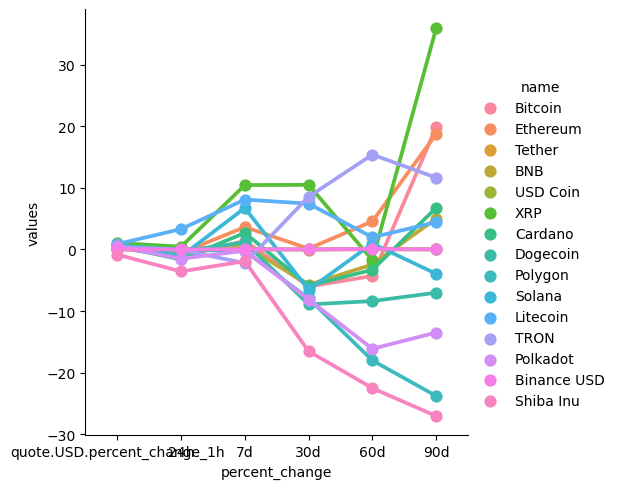

In [80]:
sns.catplot(x='percent_change', y = 'values', hue = 'name', data = df7, kind='point')

In [85]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,26801.00319,2023-06-02 01:28:20.826862
0,Bitcoin,26787.46348,NaT
0,Bitcoin,26835.78912,NaT
0,Bitcoin,26829.77376,NaT
0,Bitcoin,26819.32422,NaT
0,Bitcoin,26811.40703,NaT
0,Bitcoin,26823.26411,NaT


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

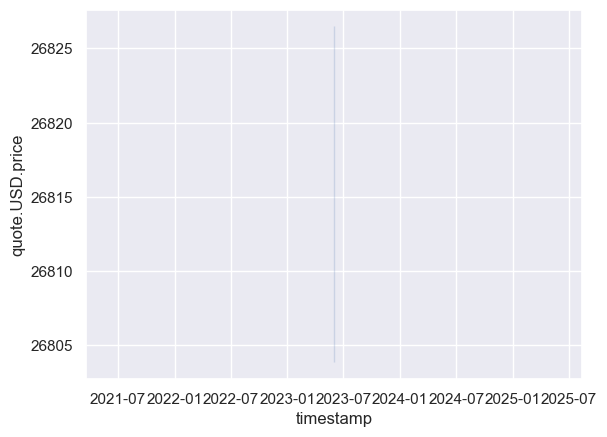

In [87]:
sns.set_theme(style = 'darkgrid')
sns.lineplot(x='timestamp', y= 'quote.USD.price', data = df10)